■ 7장. CNN (Convolution Neural network) 합성곱 신경망

    " Convolution 층과 pooling 층을 포함하는 신경망 "
    
    ※ 기존 신경망과의 창?
    
        - 기존방법: Affine  -->  ReLU
        - CNN     : Conv    -->  ReLU  -->  Pooling

    - 기존에 구현했던 완전 연결 계층의 문제점?
    
        " 데이터 형상이 무시된다 "
        
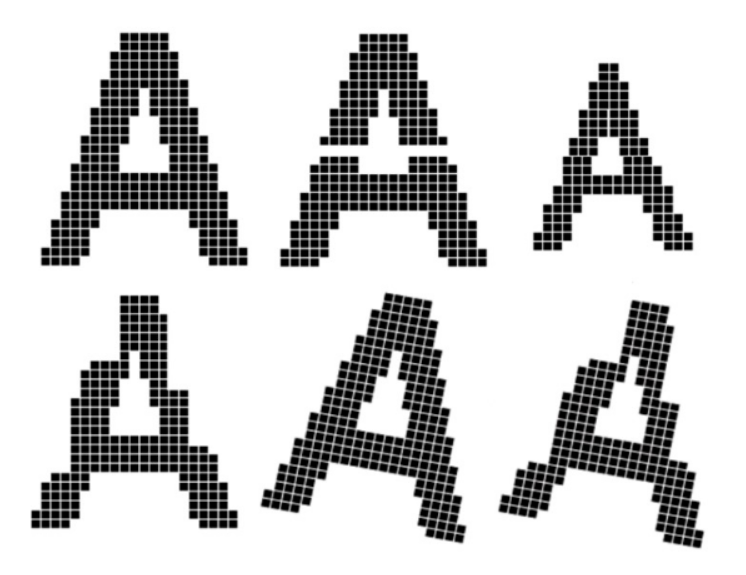

       기존방법:필기체는 28 X 28=784의 1차원 데이터로 변경을 해서 784개의 데이터를 첫 affine 계층에 입력하는 방법
       
          글자의 크지가 달라지거나 글자가 회전되거나, 글자에 변형이 조금만 생기더라도
          새로운 학습 데이터를 넣어주지 않으면 좋은 결과를 기대하기 어렵다
          
          즉, 본직적인 패턴을 읽지 못한다.

    - 합성곱 계층
    
        원본 이미지를 가지고 여러개의 feature map을 만들어서 분류하는 완전 연결 계층에 입력한다.
        
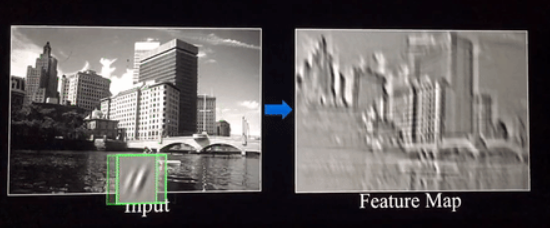

        feature mape(특징맵)을 만들고 그 feature map을 선명하게 해주는 층

**기존 계층**
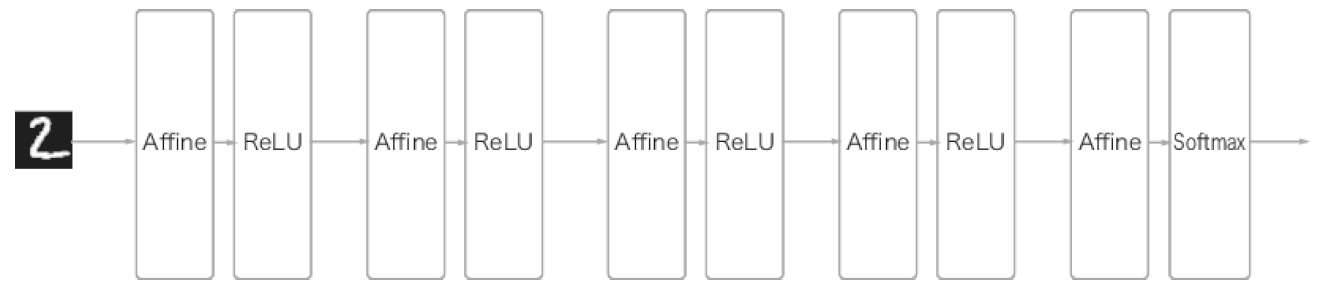

**합성곱 계층**
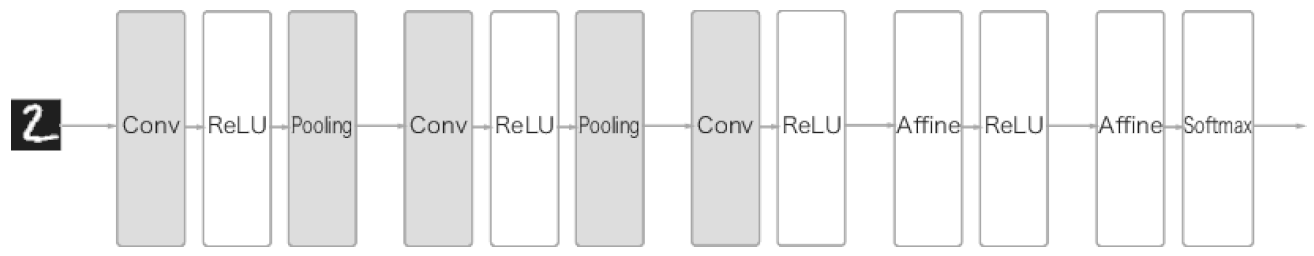
        

※ 합성곱 연산

    이미지 3차원(세로, 가로, 색상) data의 형상을 유지하면서 연산하는 작업
    
    " 입력 데이터에 필터를 적용한 것이 합성곱 연산이다."
    
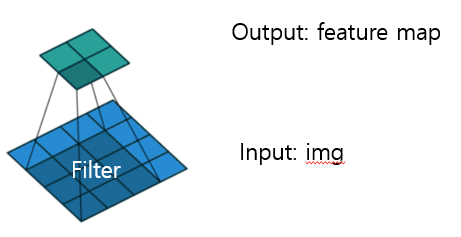

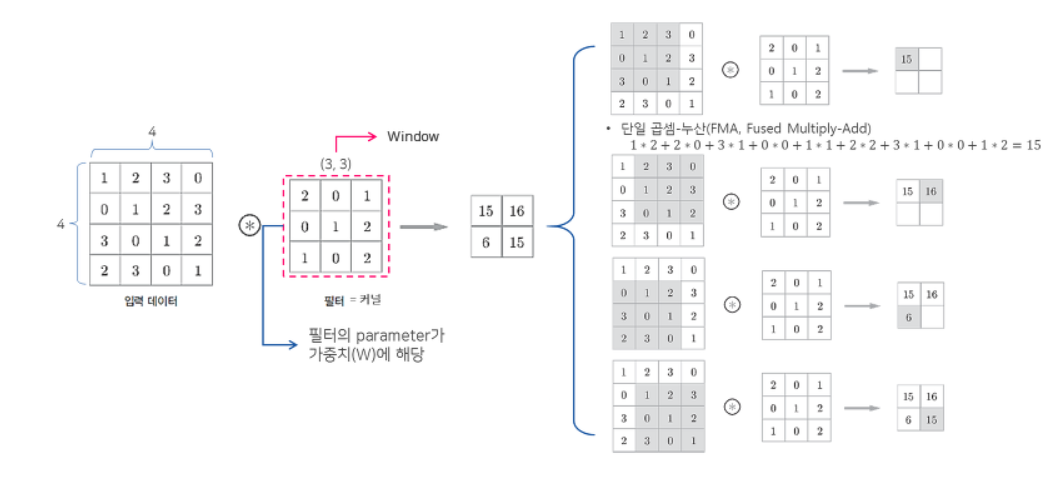

In [3]:
# 합성곱결과를 출력하시오
import numpy as np

a = np.array([[1,2,3],[0,1,2],[3,0,1]])  # input_x
b = np.array([[2,0,1],[0,1,2],[1,0,2]])  # filter_

print(a*b)
print(np.sum(a*b)) # 곱셈누산

[[2 0 3]
 [0 1 4]
 [3 0 2]]
15


In [40]:
# 행렬을 만드시오

input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])

# print(np.array(input_.flatten()[:9]).reshape(3,3))
print(input_[:3,:3])
print(input_[:3,1:3+1])
print(input_[1:3+1,:3])
print(input_[1:3+1,1:3+1])

[[1 2 3]
 [0 1 2]
 [3 0 1]]
[[2 3 0]
 [1 2 3]
 [0 1 2]]
[[0 1 2]
 [3 0 1]
 [2 3 0]]
[[1 2 3]
 [0 1 2]
 [3 0 1]]


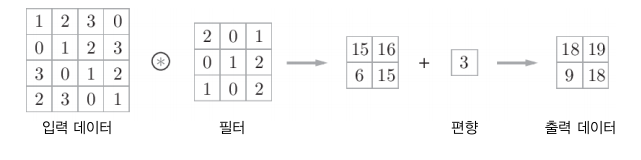

In [88]:
# 위의 그림을 파이썬으로 출력하시오
input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])
bias=3
print(input_)
print(filter_)

# print(input_.shape)

# ((0,3),(0,3)),((0,3),(1,4)),((1,4),(0,3)),((1,4),(1,4))
a = input_.shape[0]-filter_.shape[0] + 1
b = input_.shape[1]-filter_.shape[1] + 1
result2 = []
for rn in range(a):
    for cn in range(b):
        result1 = input_[rn:rn+filter_.shape[0],cn:cn+filter_.shape[1]] * filter_
        result2.append(np.sum(result1)+bias)

print(np.array(result2).reshape(a,b))
result = np.array(result2).reshape(a,b)

[[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
[[2 0 1]
 [0 1 2]
 [1 0 2]]
[[18 19]
 [ 9 18]]


■ 패딩

    " 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값으로 채워 늘리는 것을 말한다. "
    
    ※ 패딩이 필요한 이유?
        
        패딩을 하지 않을 경우 data의 공간 크지는 합성곱 계층을 지날때마다 작아지게 되므로
        가장자리 정보들이 사라지는 문제가 발생하기 때문에 패딩을 사용한다.
    
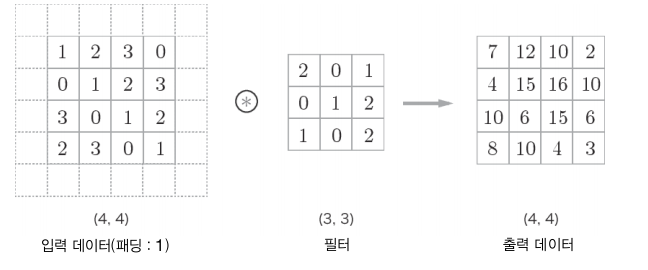

In [90]:
# 패딩구현하기
print(result)
result_pad = np.pad(result, pad_width=1, mode='constant', constant_values=0)
print(result_pad)

[[18 19]
 [ 9 18]]
[[ 0  0  0  0]
 [ 0 18 19  0]
 [ 0  9 18  0]
 [ 0  0  0  0]]


■ 출력 크기 공식
    
    " 필터를 적용하는 위치의 간격을 스트라이드라고 한다. "
    
    예: 위에서 구현한 conv는 스트라이드가 1이다.
    
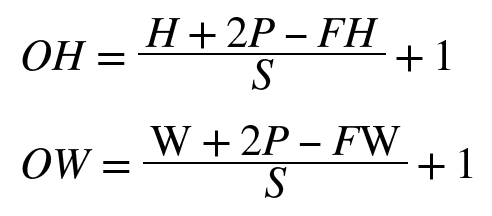

입력크기를 (H, W), 필터 크기를 (FH, FW), 출력 크기를 (OH, OW), 패댕을 P, 스트라이드를 S라고 하면 출력크기는 위의 식으로 계산한다.


        (OH - 1) * S - H + FH
    P = ------------------------
                     2

In [104]:
# input_img = 4 X 4 , filter = 3 X 3 , output = 4 X 4 ? 패딩으로 조절해보기
p = (1/2) * (((input_.shape[0] - 1) * 1) - input_.shape[0] + filter_.shape[0])
# p = (1/2) * (((4-1) * 1) - 4 + 3)
print(p)

1.0


In [106]:
# 위의 그림을 파이썬으로 출력하시오
input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])
bias=3
print(input_)
print(filter_)

# print(input_.shape)

# ((0,3),(0,3)),((0,3),(1,4)),((1,4),(0,3)),((1,4),(1,4))
a = input_.shape[0]-filter_.shape[0] + 1
b = input_.shape[1]-filter_.shape[1] + 1
result2 = []
for rn in range(a):
    for cn in range(b):
        result1 = input_[rn:rn+filter_.shape[0],cn:cn+filter_.shape[1]] * filter_
        result2.append(np.sum(result1)+bias)

result = np.array(result2).reshape(a,b)
print(result)

# padding
p = (1/2) * (((input_.shape[0] - 1) * 1) - input_.shape[0] + filter_.shape[0])
result_pad = np.pad(result, pad_width=int(p), mode='constant', constant_values=0)
print(result_pad)

[[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
[[2 0 1]
 [0 1 2]
 [1 0 2]]
[[18 19]
 [ 9 18]]
[[ 0  0  0  0]
 [ 0 18 19  0]
 [ 0  9 18  0]
 [ 0  0  0  0]]


In [107]:
# input_img = 6 X 6 , filter = 3 X 3 , output = 6 X 6 ? 패딩으로 조절해보기
p = (1/2) * (((6 - 1) * 1) - 6 + 3)
print(p)


1.0


In [85]:
# 위의 그림을 파이썬으로 출력하시오
# 패딩 하드코딩으로 채움
# input_ = np.array([[0,0,0,0,0,0],[0,1,2,3,0,0],[0,0,1,2,3,0],[0,3,0,1,2,0],[0,2,3,0,1,0],[0,0,0,0,0,0]])
input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
input_ = np.pad(input_, pad_width=1, mode='constant', constant_values=0)
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])
bias=0
print(input_)
print(filter_)

# print(input_.shape)

a = input_.shape[0]-filter_.shape[0] + 1
b = input_.shape[1]-filter_.shape[1] + 1
result2 = []
for rn in range(a):
    for cn in range(b):
        result1 = input_[rn:rn+filter_.shape[0],cn:cn+filter_.shape[1]] * filter_
        result2.append(np.sum(result1)+bias)

result = np.array(result2).reshape(a,b)
print(result)

[[0 0 0 0 0 0]
 [0 1 2 3 0 0]
 [0 0 1 2 3 0]
 [0 3 0 1 2 0]
 [0 2 3 0 1 0]
 [0 0 0 0 0 0]]
[[2 0 1]
 [0 1 2]
 [1 0 2]]
[[ 7 12 10  2]
 [ 4 15 16 10]
 [10  6 15  6]
 [ 8 10  4  3]]


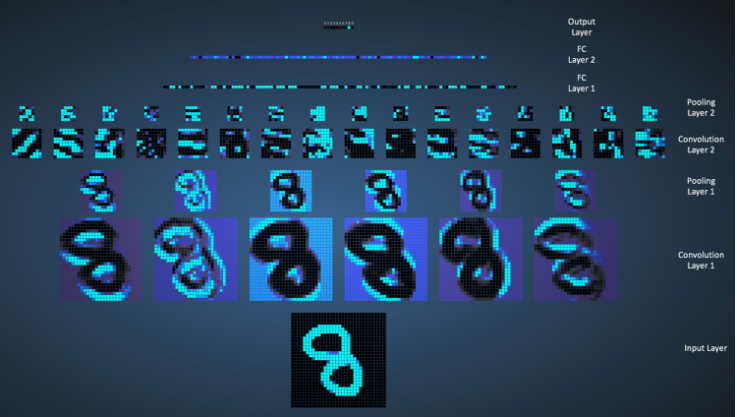

■ 3차원 합성곱
    
    이미지의 색깔이 보통 흑백이 아니라 RGB(Red, Green, Blue) 컬러이므로 RGB 컬러에대해 합성곱을 해야한다.
    
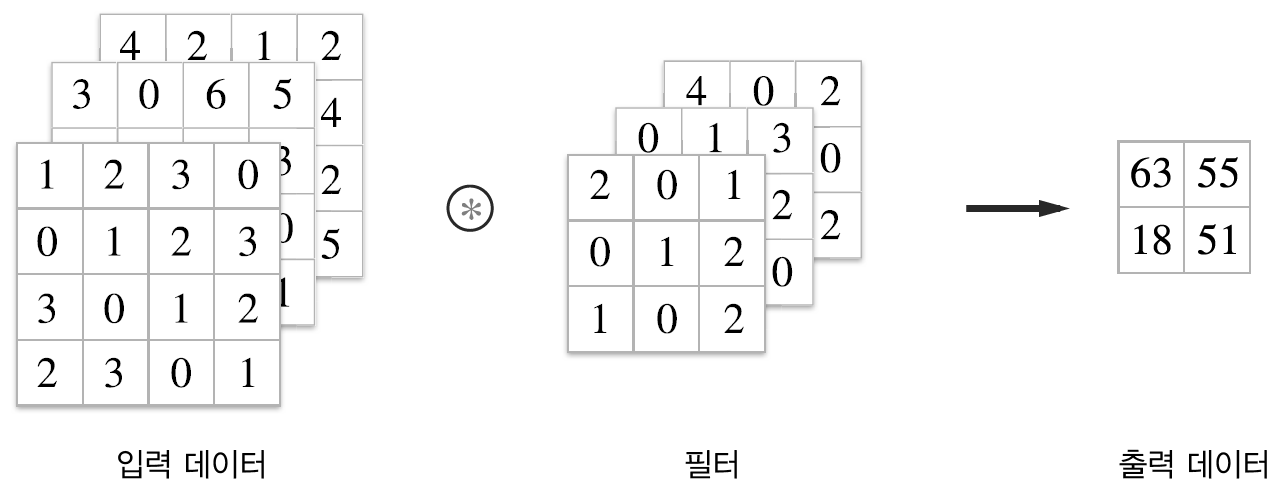
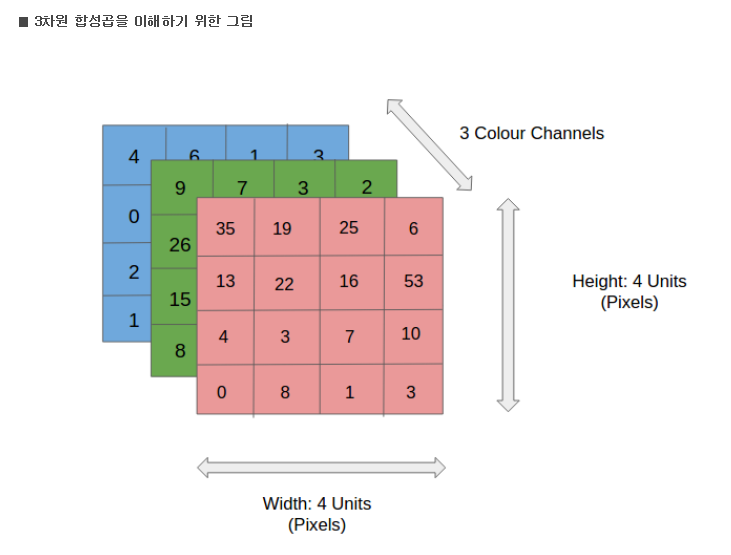

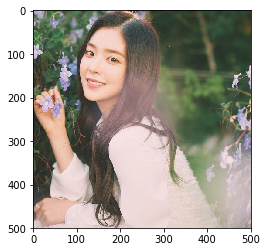

In [39]:
# 레드벨벳의 아이린 사진을 3차원 행렬로 변환하시오

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##1.이미지 불러오기
img = Image.open('C://img//아이린.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel)
plt.show()


[[ 79 113 147 ...,  50  50  50]
 [101 137 169 ...,  51  51  50]
 [116 152 181 ...,  49  49  49]
 ..., 
 [219 219 222 ..., 163 173 184]
 [222 222 224 ..., 163 174 184]
 [222 223 225 ..., 165 176 184]]


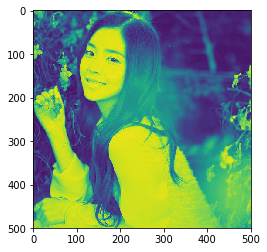

In [36]:
# red 행렬만 출력하고 시각화하기

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

##1.이미지 불러오기
img = plt.imread('C://img//아이린.jpg')
# img = plt.imread('C://img//수제맥주.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel[:,:,0])  # 가로, 세로, 색상
print(img_pixel[:,:,0])      # 0: red, 1: green, 2:blue
plt.show()

(3, 5, 5)
[[2 2 1 1 0]
 [0 0 1 0 0]
 [0 2 0 0 1]
 [1 2 1 1 1]
 [1 0 1 0 1]]


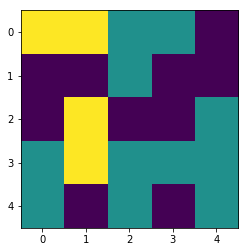

In [56]:
# 아래의 data의 shape를 확인하시오

import numpy as np
import matplotlib.pyplot as plt

data = np.array(
       [
         [[2, 2, 1, 1, 0],
          [0, 0, 1, 0, 0],
          [0, 2, 0, 0, 1],
          [1, 2, 1, 1, 1],    #  --->  Red 
          [1, 0, 1, 0, 1]],
         [[2, 0, 0, 0, 1],
          [0, 2, 2, 0, 1],
          [0, 0, 0, 0, 2],    # ---->  Green
          [0, 1, 2, 0, 1],
          [2, 0, 2, 2, 2]],
         [[4, 2, 1, 2, 2],
          [0, 1, 0, 4, 1],      # ---->  Blue
          [3, 0, 6, 2, 1],
          [4, 2, 4, 5, 4],
          [0, 1, 2, 0, 1]]
       ])

print(data.shape)  # 색상, 가로, 세로


# re행렬만 가져오고 시각화 하시오

print(data[0,:,:])   # == data[0]
plt.imshow(data[0,:,:])
plt.show()

[[[ 1  1 -1 -1  0  0  1  1  0]
  [-1 -1  0  0 -1  1  0 -1  0]
  [-1  1  1 -1  1 -1  0  0 -1]]]
(1, 3, 9)
3
[[[ 1  1 -1]
  [-1  0  0]
  [ 1  1  0]]

 [[-1 -1  0]
  [ 0 -1  1]
  [ 0 -1  0]]

 [[-1  1  1]
  [-1  1 -1]
  [ 0  0 -1]]]
(3, 3, 3)
3


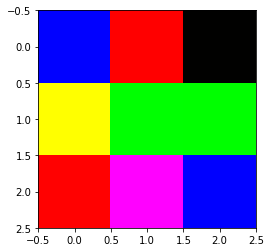

In [123]:
# filter 만들기
Filter=np.array([[[1,1,-1,-1,0,0,1,1,0],[-1,-1,0,0,-1,1,0,-1,0],[-1,1,1,-1,1,-1,0,0,-1]]])

print(Filter)

print(Filter.shape)
print(Filter.ndim)

# shape 변경
print(Filter.reshape(3,3,3))
Filter = np.array(Filter).reshape(3,3,3)

print(Filter.shape)
print(Filter.ndim)

plt.imshow(Filter.astype(np.uint8)) # 위의 행렬을 완전 검정으로 변환
plt.show()

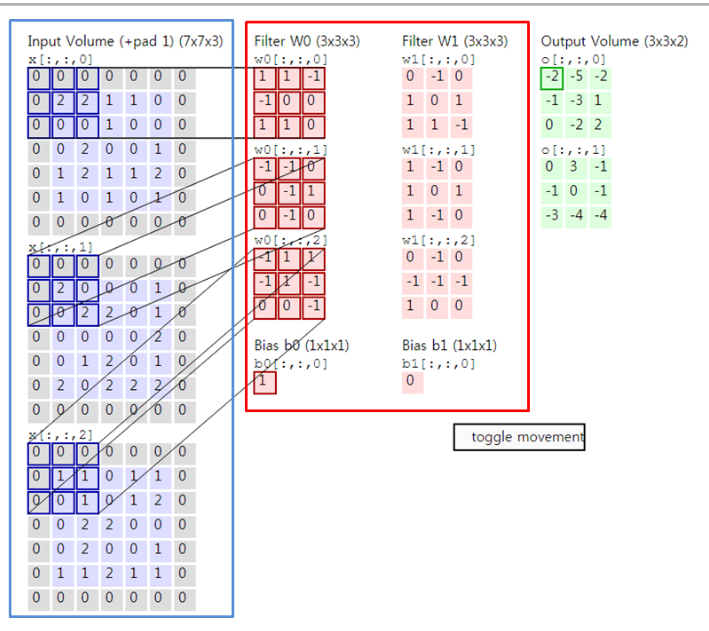

In [133]:
data = np.array(
       [
         [[2, 2, 1, 1, 0],
          [0, 0, 1, 0, 0],
          [0, 2, 0, 0, 1],
          [1, 2, 1, 1, 1],    #  --->  Red 
          [1, 0, 1, 0, 1]],
         [[2, 0, 0, 0, 1],
          [0, 2, 2, 0, 1],
          [0, 0, 0, 0, 2],    # ---->  Green
          [0, 1, 2, 0, 1],
          [2, 0, 2, 2, 2]],
         [[4, 2, 1, 2,2],
          [0, 1, 0, 4,1],      # ---->  Blue
          [3, 0, 6, 2,1],
          [4, 2, 4, 5,4],
          [0, 1, 2, 0, 1]]
       ])
 
print (data) 

# data_red = np.pad(data[0,:,:], pad_width=1, mode='constant', constant_values=0)

# data_green = np.pad(data[1,:,:], pad_width=1, mode='constant', constant_values=0)

# data_blue = np.pad(data[2,:,:], pad_width=1, mode='constant', constant_values=0)
# print(data_red,data_green,data_blue)

# 0,0: data 전체의 앞,뒤 , 1,1 : 위아래 갯수, 1,1: 양옆 갯수
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)), mode='constant', constant_values=0)
print(pad)

[[[2 2 1 1 0]
  [0 0 1 0 0]
  [0 2 0 0 1]
  [1 2 1 1 1]
  [1 0 1 0 1]]

 [[2 0 0 0 1]
  [0 2 2 0 1]
  [0 0 0 0 2]
  [0 1 2 0 1]
  [2 0 2 2 2]]

 [[4 2 1 2 2]
  [0 1 0 4 1]
  [3 0 6 2 1]
  [4 2 4 5 4]
  [0 1 2 0 1]]]
[[[0 0 0 0 0 0 0]
  [0 2 2 1 1 0 0]
  [0 0 0 1 0 0 0]
  [0 0 2 0 0 1 0]
  [0 1 2 1 1 1 0]
  [0 1 0 1 0 1 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 2 0 0 0 1 0]
  [0 0 2 2 0 1 0]
  [0 0 0 0 0 2 0]
  [0 0 1 2 0 1 0]
  [0 2 0 2 2 2 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 4 2 1 2 2 0]
  [0 0 1 0 4 1 0]
  [0 3 0 6 2 1 0]
  [0 4 2 4 5 4 0]
  [0 0 1 2 0 1 0]
  [0 0 0 0 0 0 0]]]


In [140]:
# 1 zero padding 한 Red 행렬의 결과에서 3X3 행렬만 추출하시오
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)), mode='constant', constant_values=0)
# print(pad)

red=pad[0]

print(red[:3,:3])

# 모든 RGB의 3x3행렬을 각각 뽑으시오
print(pad[1,:3,:3])
print(pad[2,:3,:3])

[[0 0 0]
 [0 2 2]
 [0 0 0]]
[[0 0 0]
 [0 2 0]
 [0 0 2]]
[[0 0 0]
 [0 4 2]
 [0 0 1]]


In [142]:
# 아래의 필터에서 아래의 행렬을 추출하시오
Filter=np.array([[[1,1,-1,-1,0,0,1,1,0],   \
                  [-1,-1,0,0,-1,1,0,-1,0], \
                  [-1,1,1,-1,1,-1,0,0,-1]]]).reshape(3,3,3)
# 결과 :
#   1  1 -1
#  -1  0  0 
#   1  1  0

print(Filter[0])

[[ 1  1 -1]
 [-1  0  0]
 [ 1  1  0]]


In [143]:
# 위의 3개의 행렬중 Red 행렬과 아래의 filter 중 Red 행렬과 합성곱을 수행하시오 !
pad[0,:3,:3] * Filter[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [150]:
# 아래의 원본 이미지 RGB  3개의 행렬과 아래의 필터 RGB 3개의 
#          행렬을 각각 행렬곱 한후 그 원소들을 다 합친 결과 숫자 하나를 
#          출력하시오 ! ( 3차원 합성곱 연산) 
         
# [[0 0 0]         1  1 -1     0  0  0
#  [0 2 2]     *  -1  0  0  =  0  0  0
#  [0 0 0]]        1  1  0     0  0  0

# [[0 0 0]        -1 -1  0     0  0  0
#  [0 2 0]     *   0 -1  1  =  0 -2  0
#  [0 0 2]]        0 -1  0     0  0  0 

# [[0 0 0]        -1  1  1     0  0  0
#  [0 1 1]     *  -1  1 -1  =  0  1  -1
#  [0 0 1]]        0  0 -1     0  0  -1

# 결과 : - 3

data = np.array(
    [
        [[2, 2, 1, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 2, 1, 1, 1],  # --->  Red
         [1, 0, 1, 0, 1]],
        [[2, 0, 0, 0, 1],
         [0, 2, 2, 0, 1],
         [0, 0, 0, 0, 2],  # ---->  Green
         [0, 1, 2, 0, 1],
         [2, 0, 2, 2, 2]],
        [[1, 1, 0, 1, 1],
         [0, 1, 0, 1, 2],  # ---->  Blue
         [0, 2, 2, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 1, 2, 1, 1]]
    ])
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)),
           mode='constant', constant_values=0)

red = pad[0,:3,:3] * Filter[0]
green = pad[1,:3,:3] * Filter[1]
blue = pad[2,:3,:3] * Filter[2]

# print(red)
# print(green)
# print(blue)
print(np.sum(red+green+blue))

[[[0 0 0 0 0 0 0]
  [0 2 2 1 1 0 0]
  [0 0 0 1 0 0 0]
  [0 0 2 0 0 1 0]
  [0 1 2 1 1 1 0]
  [0 1 0 1 0 1 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 2 0 0 0 1 0]
  [0 0 2 2 0 1 0]
  [0 0 0 0 0 2 0]
  [0 0 1 2 0 1 0]
  [0 2 0 2 2 2 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 1 1 0 1 1 0]
  [0 0 1 0 1 2 0]
  [0 0 2 2 0 0 0]
  [0 0 2 0 0 1 0]
  [0 1 1 2 1 1 0]
  [0 0 0 0 0 0 0]]]
-3


In [162]:
# 1칸 슬라이드한 원본 이미지의 3x3과 filter rgb와의 곱을 구하시오
# print(pad)
# print(pad[0,:3,1:3+1])

red = pad[0,:3,1:3+1] * Filter[0]
green = pad[1,:3,1:3+1] * Filter[1]
blue = pad[2,:3,1:3+1] * Filter[2]

# print(red)
# print(green)
# print(blue)
print(np.sum(red+green+blue))

-4


In [195]:
# 위의 그림을 파이썬으로 구현하시오

data = np.array(
    [
        [[2, 2, 1, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 2, 1, 1, 1],  # --->  Red
         [1, 0, 1, 0, 1]],
        [[2, 0, 0, 0, 1],
         [0, 2, 2, 0, 1],
         [0, 0, 0, 0, 2],  # ---->  Green
         [0, 1, 2, 0, 1],
         [2, 0, 2, 2, 2]],
        [[1, 1, 0, 1, 1],
         [0, 1, 0, 1, 2],  # ---->  Blue
         [0, 2, 2, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 1, 2, 1, 1]]
    ])
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)),
           mode='constant', constant_values=0)

result = []

for i in range(pad.shape[2]-2):
    for j in range(pad.shape[1]-2):
#         red = pad[0,i:3+i,j:3+j] * Filter[0]
#         green = pad[1,i:3+i,j:3+j] * Filter[1]
#         blue = pad[2,i:3+i,j:3+j] * Filter[2]
#         # print(i,j)
#         result.append(np.sum(red+green+blue))
        
        result1 = pad[:,i:i+3,j:j+3] * Filter
        result.append(np.sum(result1))
        
# output은 input과 shape이 같아야한다.
print(np.array(result).reshape(data.shape[1:]))

[[-3 -4 -6 -1 -3]
 [-1  2  0  3 -1]
 [-2  0 -4  3 -1]
 [-3  7 -6 -6 -3]
 [-1  2 -3 -3  0]]


■ 합성곱 총정리

    합성곱? 이미지의 특징(feature map)을 추출하는 과정,
            filter(가중치) 를 이용해서 추출한다.

        원본이미지 1장 * 필터 50개 = feature map 의 갯수 (50)

            5 x 5          5 x 5        5 x 5

        ※ 패딩 1을 해주면 입력값과 동일한 shape가 출력될 수 있다.


In [226]:
# 입력행렬과 필터행렬과 스트라이드와 패딩을 입력받아 출력행렬의 shape를 출력하는 함수를 생성하시오

# 위의 그림을 파이썬으로 구현하시오

data = np.array(
    [
        [[2, 2, 1, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 2, 1, 1, 1],  # --->  Red
         [1, 0, 1, 0, 1]],
        [[2, 0, 0, 0, 1],
         [0, 2, 2, 0, 1],
         [0, 0, 0, 0, 2],  # ---->  Green
         [0, 1, 2, 0, 1],
         [2, 0, 2, 2, 2]],
        [[1, 1, 0, 1, 1],
         [0, 1, 0, 1, 2],  # ---->  Blue
         [0, 2, 2, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 1, 2, 1, 1]]
    ])

Filter=np.array([[[1,1,-1,-1,0,0,1,1,0],   \
                  [-1,-1,0,0,-1,1,0,-1,0], \
                  [-1,1,1,-1,1,-1,0,0,-1]]]).reshape(3,3,3)

def output(I,F,S,P):

    H = I.shape[1]
    FH = F.shape[1]

    return int(1+(H + 2*P - FH) / S)

def output_shape(inputs, Filter, stride, padding):
    n = padding
    
    pad=np.pad(data,pad_width=((0,0),(n,n),(n,n)),
               mode='constant', constant_values=0)

    result = []

    for i in range(0, pad.shape[2]-stride-1, stride):
        for j in range(0, pad.shape[1]-stride-1, stride):
            result1 = pad[:,i:i+Filter.shape[1],j:j+Filter.shape[2]] * Filter
            result.append(np.sum(result1))

    # output은 input과 shape이 같아야한다.
    k = output(inputs,Filter,stride,padding)
    outputs = np.array(result).reshape((k,k))
    
    return outputs

print(output_shape(data, Filter, 1, 1))
print(output_shape(data, Filter, 1, 2))
# print(output_shape(data, Filter, 2, 1))

[[-3 -4 -6 -1 -3]
 [-1  2  0  3 -1]
 [-2  0 -4  3 -1]
 [-3  7 -6 -6 -3]
 [-1  2 -3 -3  0]]
[[-1 -1  4  2  1  0  0]
 [ 1 -3 -4 -6 -1 -3 -1]
 [-1 -1  2  0  3 -1 -3]
 [ 0 -2  0 -4  3 -1 -3]
 [-1 -3  7 -6 -6 -3 -2]
 [ 0 -1  2 -3 -3  0 -3]
 [ 0  1  0  1 -4 -3 -2]]


■ 블록으로 생각하기

    3차원 합성곱 연산은 데이터와 필터를 직육면체 블러이라고 생각하면 쉽다
    
    블럭은 3차원 직육면체 (채널c, 높이h, 너비w) 로 구성됨

    필터의 채널(FC), 필터의 높이(FH), 필터의 너비(FW)
    
    
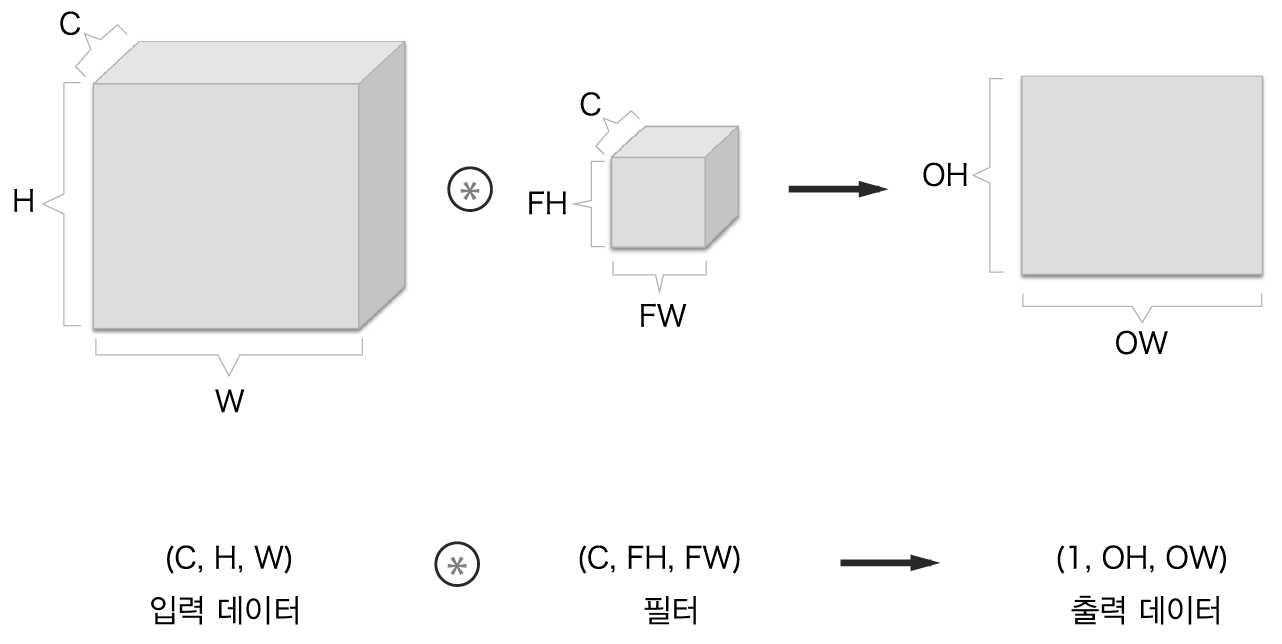



    아이린 사진 한장(RGB)를 RGB 필터로 합성곱해서 2차원 출력행렬(feature map) 1장을 출력한 그림
    
    위의 그림은 feature map이 한 개가 나오는데
    실제로는 아이린 사진 한 장에 대해서 여러개의 feature map이 필요하다.
    여러개의 feature map을 출력하려면 어떻게 해야하는가?
    
    -> filter의 갯수를 늘린다.
    
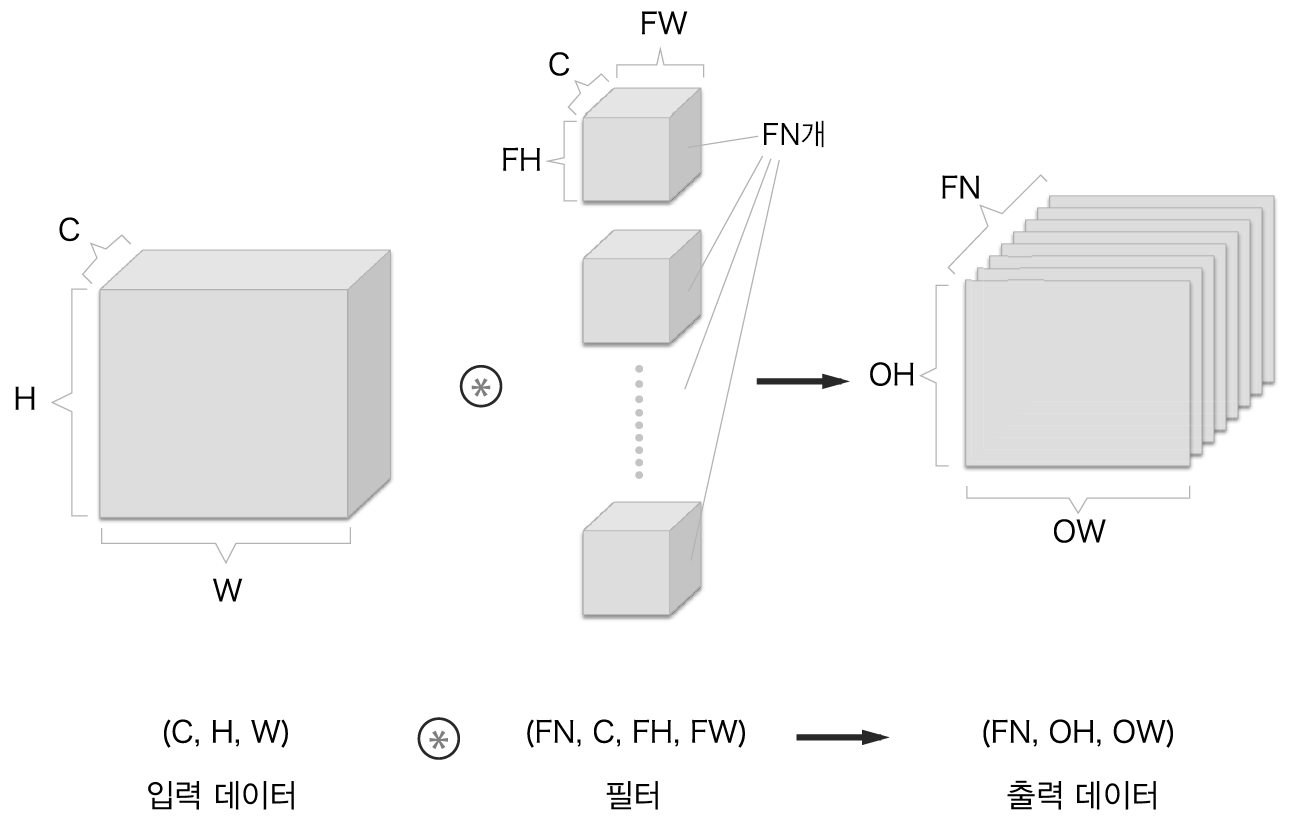

※ 문제.

강아지 사진 50장과 고양이 사진 50장, 총 100장의 사진을 신경망에 입력해서

강아지와 고양이를 구분(분류)하는 신경마을 만든다고 할 때, rgb 필터를 30개 사용하면 출력 feature map이 총 몇개일까?


100장  --> 3000장

※ 합성곱 연산에서 편향(bias)를 더하면

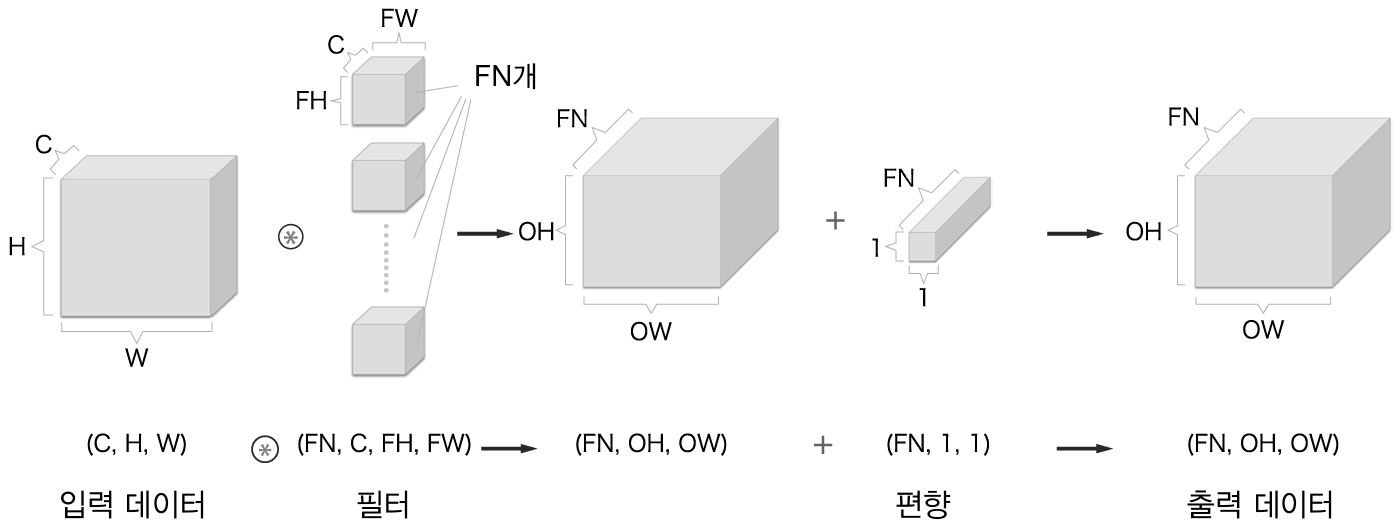


위의 그림은 이미지를 1장씩 넣어서 학습시키는 것이므로 학습속도가 느리므로

100장의 이미지를 묶음으로 나눠서 한번에 입력해서 학습시키면(mini batch) 아래의 그림이 된다.

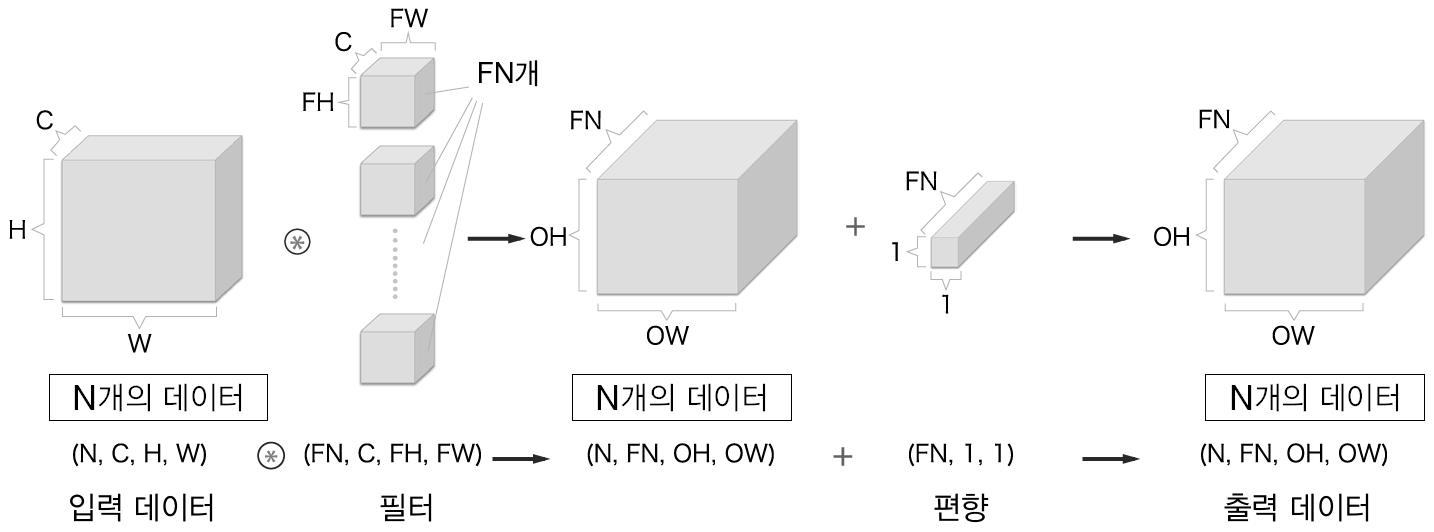


결국 합성곱 계층을 구현할 때 4차원 행렬이 연산이 되기 때문에 연산 속도가 느리므로

행렬 연산을 빠르게 하려면 4차원이 아닌 2차원으로 차원 축소가 필요하다.

**--> im2col 함수 **

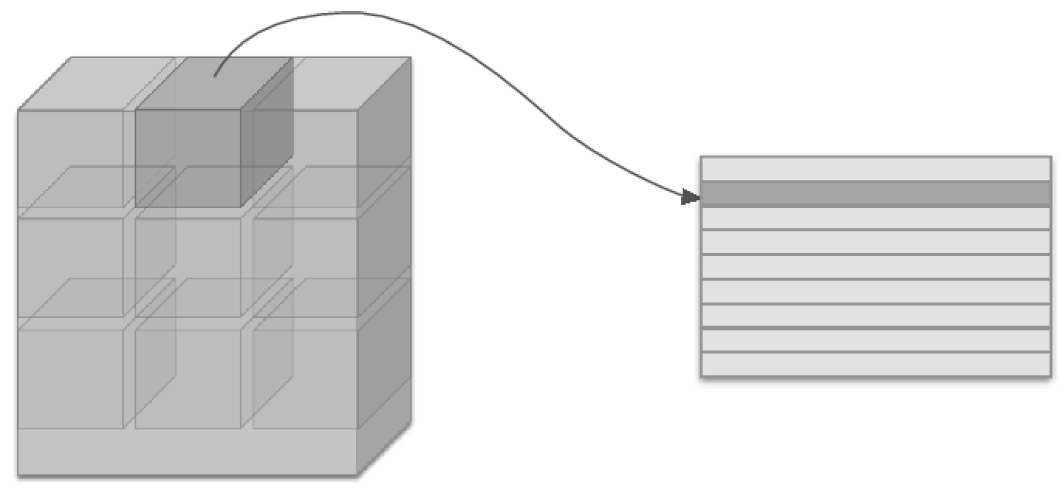

※ 각 블럭을 R,G,B로 각각 나눠 2차원으로 변환 후 합쳐준다.

※ 배치를 사용할 때: 위의 step을 여러번 하여 나온 결과인 2차원 여러개를 합쳐준다.

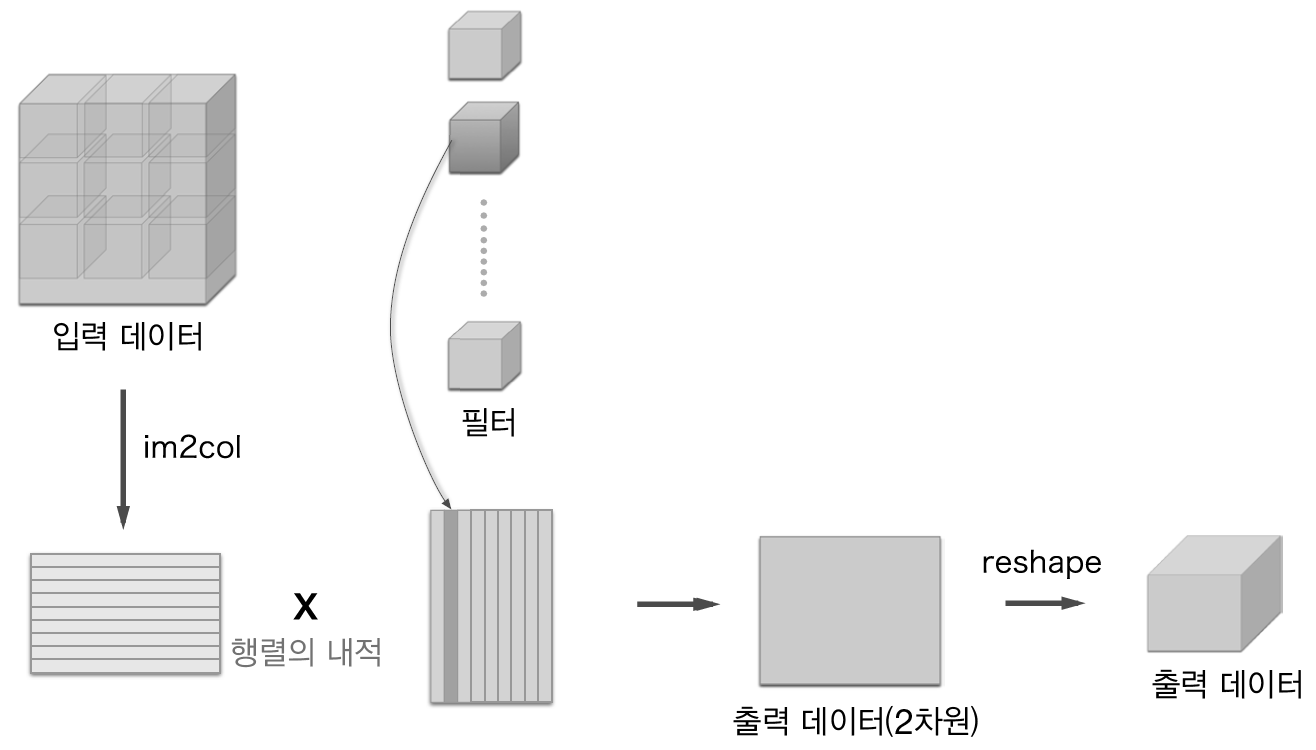

In [4]:
# rgb 7X7 행렬 만들기
import numpy as np

x = np.random.rand(1,3,7,7)  # 1장, c:3, h:3, w:3

print(x)
print(x.shape)

[[[[ 0.28192154  0.92347331  0.04318946  0.27640029  0.66874823  0.59909893
     0.71863522]
   [ 0.21311031  0.27843253  0.20561232  0.05692341  0.72918368  0.63463783
     0.86526378]
   [ 0.25292526  0.45740783  0.78697944  0.19577372  0.82156658  0.74017326
     0.64077029]
   [ 0.77588133  0.35665774  0.81870381  0.31995621  0.89073681  0.3375427
     0.12074458]
   [ 0.08388981  0.52208998  0.73046308  0.29374367  0.19827336  0.72888811
     0.20901562]
   [ 0.55689913  0.63144345  0.49706981  0.70617279  0.54354016  0.50912669
     0.18726874]
   [ 0.20243051  0.19155251  0.86698623  0.10451111  0.15566883  0.14821918
     0.03088867]]

  [[ 0.96411819  0.58868535  0.4393897   0.82875468  0.39116469  0.12169096
     0.28782232]
   [ 0.61001896  0.17911992  0.75223905  0.49100972  0.32651183  0.19448068
     0.1774673 ]
   [ 0.34645093  0.73719852  0.4938348   0.09525579  0.11513049  0.2757584
     0.59983614]
   [ 0.70491234  0.28281273  0.27077272  0.1828286   0.40228722  0.123

In [6]:
# rgb 5x5 필터를 사용할 것이다.
# 위에서 만든 4차원 행렬을 2차원 행렬로 변환하시오

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

col = im2col(x,5,5, stride=1,pad=0)
print(col)
print(col.shape)

[[ 0.28192154  0.92347331  0.04318946  0.27640029  0.66874823  0.21311031
   0.27843253  0.20561232  0.05692341  0.72918368  0.25292526  0.45740783
   0.78697944  0.19577372  0.82156658  0.77588133  0.35665774  0.81870381
   0.31995621  0.89073681  0.08388981  0.52208998  0.73046308  0.29374367
   0.19827336  0.96411819  0.58868535  0.4393897   0.82875468  0.39116469
   0.61001896  0.17911992  0.75223905  0.49100972  0.32651183  0.34645093
   0.73719852  0.4938348   0.09525579  0.11513049  0.70491234  0.28281273
   0.27077272  0.1828286   0.40228722  0.22440374  0.55052681  0.79991379
   0.78172653  0.76901582  0.74925061  0.28690229  0.21083773  0.24588313
   0.4267012   0.2506995   0.47386395  0.0050615   0.17818877  0.10684723
   0.40321399  0.19557313  0.89143771  0.61694267  0.30521879  0.68979359
   0.8555104   0.32797848  0.78602342  0.50098357  0.00574449  0.51237854
   0.43835448  0.58920496  0.60053558]
 [ 0.92347331  0.04318946  0.27640029  0.66874823  0.59909893  0.27843253

In [12]:
# rgb 7x7을 10장 만드시오
import numpy as np

X = np.random.rand(10,3,7,7) # 10장, c:3, h:3, w:3

# print(X)
print("X.shape:", X.shape)

col = im2col(X,5,5, stride=1,pad=0)
# print(col)
print("col.shape:", col.shape)

X.shape: (10, 3, 7, 7)
col.shape: (90, 75)


■ 2차원으로 변경해야할 행렬 2가지

    1. 원본이미지를 필터 사이즈에 맞게 2차원으로 변경한 행렬
        
        im2col 함수
        
    
    2. 4차원 필터 행렬을 2차원으로 변경
    
        reshape 함수를 이용 ( FN, - 1)

In [35]:
# 아래의 filter 를 생성하고 shape 를 확인하고 전치시키시오

Filter = np.array([[[255,255,255],[255,255,255],[0,0,0],[255,255,255],[255,255,255]],
                   [[255,255,255],[255,255,255],[0,0,0],[255,255,255],[255,255,255]],
                   [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
                   [[255,255,255],[255,255,255],[0,0,0],[255,255,255],[255,255,255]],
                   [[255,255,255],[255,255,255],[0,0,0],[255,255,255],[255,255,255]]], dtype = np.uint8)


print(Filter.shape) # (5,5,3)

print(Filter.T.shape)

print(Filter.T.reshape(3,-1).shape)

# -1 option: 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어준다.

(5, 5, 3)
(3, 5, 5)
(3, 25)


In [46]:
# 아래의 4차원 행렬 filter를 numpy의 random을 이용해서 만드시오

Filter = np.random.rand(10,3,5,5)
print(Filter.shape)
# Filter

# 아래의 4차원 행렬을 3차원으로 변경하시오
Filter2 = Filter.reshape(10,3,-1)
print(Filter2.shape)

# 아래의 3차원 행렬을 2차원 행렬로 변경하시오
Filter3 = Filter2.reshape(10,-1)
print(Filter3.shape)

# 전치
Filter3.T.shape

(10, 3, 5, 5)
(10, 3, 25)
(10, 75)


(75, 10)

In [62]:
# MNIST 데이터 100장을 합성곱하기 편하도록 im2col 함수에 넣었을 때 나오는 출력을 예상하시오
# 필터의 크기=5 , 필터갯수=30, stride=1, pad=0
import numpy as np

X = np.random.rand(100,1,28,28)    # 100장, c:1, h:28, w:28
Filter = np.random.rand(30,1,5,5)  # 30장, c:1, h:5, w:5

# print(X)
print("X.shape:", X.shape)
print("filter.shape:", Filter.shape)

X_col = im2col(X,5,5, stride=1,pad=0)
print("X_col.shape:", X_col.shape)

F_col = Filter.reshape(30,-1).T
print("F_col.shape:", F_col.shape)

print(np.dot(X_col, F_col).shape)

X.shape: (100, 1, 28, 28)
filter.shape: (30, 1, 5, 5)
X_col.shape: (57600, 25)
F_col.shape: (25, 30)
(57600, 30)


In [65]:
# convolution 클래스 생성
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
    
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + ( H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + ( W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # filter transfer
        out = np.dot(col,col_W) + self.b
#         print(col.shape)     # (90, 75)
#         print(col_W.shape)   # (75, 10)
#         print(out.shape)     # (90, 10)
        
#         out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        out = out.reshape(N, -1, out_h, out_w)
        
        return out

※ 설명: out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)

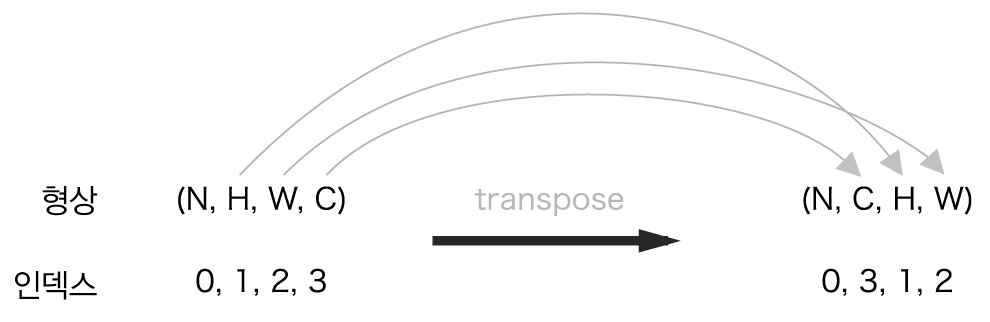

-> 축을 변경해줌

In [66]:
# 위에서 만든 Convolution class를 이용해서 Conv 층을 구현하시오

x1 = np.arange(1470).reshape(10,3,7,7)
W1 = np.arange(750).reshape(10,3,5,5)
b1 = 1

conv = Convolution(W1,b1)
f = conv.forward(x1)
print ('f.shape=', f.shape)

f.shape= (10, 10, 3, 3)


※ Channel의 값이 커지는 이유:

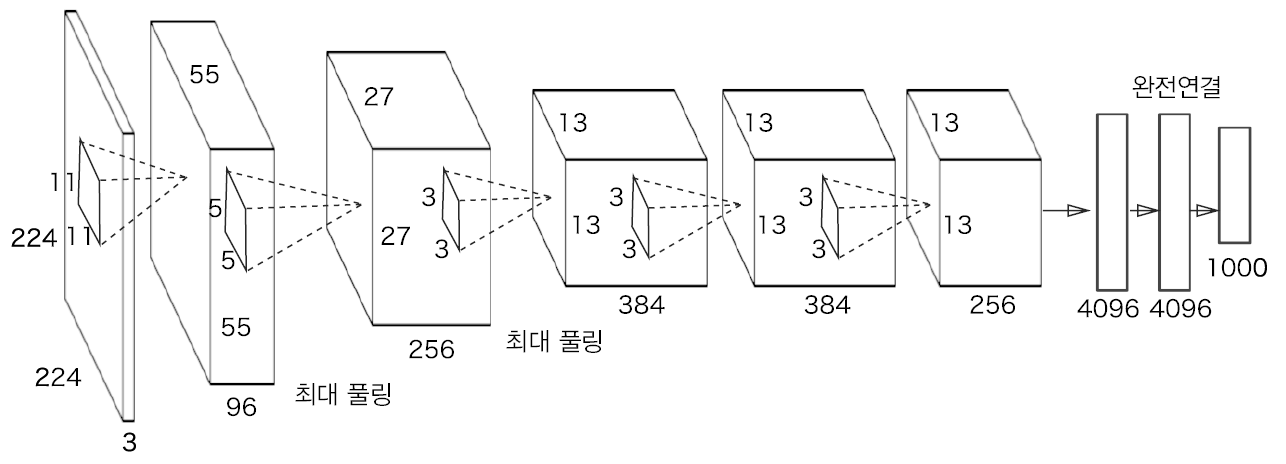

■ convolution 클래스 내에서 일어나는 일

    1. 원본이미지를 im2col을 사용하여 2차원 행렬으로 변경한다.
    2. filter 를 reshape을 사용하여 2차원 행렬로 변경한다.
    3. 2차원 행렬로 변환한 두 행렬을 내적한다.
    4. 내적한 결과인 2차원 행렬을 다시 4차원으로 변환한다.
    
■ CNN 층 구조

    conv  -->  pooling  -->  fully connected
   
    - conv: 이미지 특징(feature map)을 추출하는 층
    
    - pooling: 추출한 feature map을 선명하게 하는 층

■ 풀링(pooling) 계층의 역활

    " 출력값에서 일부만 취하는 기능 "
    
    : convolution 이 망쳐놓은 그림의 각 부분에서 대표를 뽑아 사이즈가 작은 이미지를 만드는 것
   
      마치 사진을 축소하면 해상도가 좋아지는 듯한 효과와 비슷하다
   
    ※ 풀링의 종류 3가지
    
    1. 최대 풀링
                : 컨볼루션 데이터에서 가장 큰 값을 대표값으로 선정
    2. 평균풀링
                : 컨볼루션 데이터에서 평균 값을 대표값으로 선정
    3. 확률적 풀링
                : 컨볼루션 데이터에서 임의 확률로 한 개를 선정

In [92]:
# 아래의 이미지를 최대 풀링 하시오

def max_pooling(array):  # from 유쌤
    res = []
    a = array.flatten()
    for i in range(0,12,2):
        if i==4 or i==6:
            continue
        temp=np.array([a[i:i+2], a[i+4:i+6]])
        res.append(np.max(temp))
    res = np.array(res).reshape(2,2)
    return res

a = np.array([[21,8,8,12],[12,19,9,7],[8,10,4,3],[18,12,9,10]])

print(a)

print(max_pooling(a))

# a_conv =  # convolution 층 통과한 결과값

# max_pooling = [a_conv[i,x] for i, x in enumerate(np.argmax(a_conv,0))]
# print(np.array(max_pooling).reshape(2,2))

[[21  8  8 12]
 [12 19  9  7]
 [ 8 10  4  3]
 [18 12  9 10]]
[[21 12]
 [18 10]]


In [93]:
# pooling 클래스를 생성하시오

class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + ( H - self.pool_h) / self.stride)
        out_w = int(1 + ( W - self.pool_w) / self.stride)
        
        # 전개
        col = im2col(x, FH, FW, self.stride, self.pad)
        col = col.reshape(-1,self.pool_h*self.pool_w)
        
        # max
        out = np.max(col, axis=1)
        
        # 변경
        out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)
        
        return out

### ■ Convolution Network

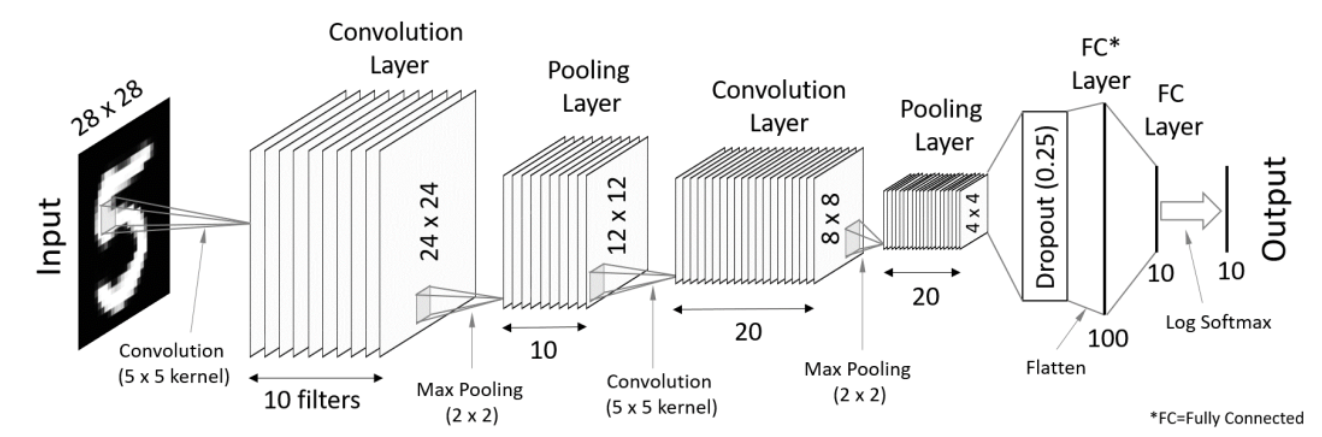

#### ■ convolution 층을 통과한 출력 이미지 사이즈 계산 방법?
 
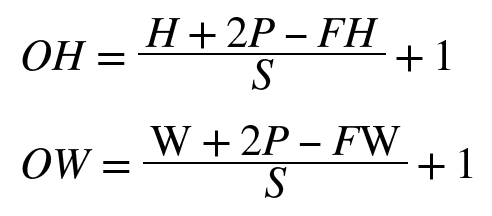

OH: 출력이미지의 높이

H: 입력이미지의 높이

P: 패딩

FH: 필터의 높이


        out_h = int(1 + ( H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + ( W + 2*self.pad - FW) / self.stride)

문제: MNIST(28 X 28) 데이터가 colvolution 층을 통과했을 때, 출력 데이터의 사이즈를 알아내시오

(필터사이즈 : 5 X 5, stride=1, padding=0)

In [98]:
pad = 0
FH = 5
H = 28
stride = 1

out_h = int(1 + ( H + 2*pad - FH) / stride)

print(out_h)

24


#### ■ pooling 층을 통과한 출력 이미지의 사이즈 계산 방법?

        out_h = int(1 + ( H - self.pool_h) / self.stride)
        out_w = int(1 + ( W - self.pool_w) / self.stride)

문제: 입력 이미지(24x24) 행렬이 풀링층을 통과했을 때 출력되는 이미지의 크기가 어떻게 되는가?

(pooling_h: 2, stride : 2)

In [99]:
H = out_h
pool_h = 2
stride = 2

out_h = int(1 + ( H - pool_h) / stride)

print(out_h)

12


In [108]:
import numpy as np
from dataset.mnist import load_mnist
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient  # 수치미분 함수
from collections import OrderedDict
import pickle
import matplotlib.pyplot as plt

# class SimpleConvNet:
#     def __init__(self, input_dim=(1,28,28),
# #                  conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
#                   filter_num=30, filter_size=5, pad = 0, stride = 1,
#                   hidden_size=100, output_size=10, weight_init_std=0.01):
# #         filter_num = conv_param['filter_num']
# #         filter_size = conv_param['filter_size']
# #         filter_pad = conv_param['pad']
# #         filter_stride = conv_param['stride']
class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """

    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))
        
            # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()



    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x



    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)



    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1: t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i * batch_size:(i + 1) * batch_size]
            tt = t[i * batch_size:(i + 1) * batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]



    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads



    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads



    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)



    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i + 1)]
            self.layers[key].b = self.params['b' + str(i + 1)]



# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet()


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")


# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]


    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    # 매개변수 갱신

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


Saved Network Parameters!
600.0
(60000, 1, 28, 28)
train acc, test acc | 0.105033333333, 0.1005
(60000, 1, 28, 28)
train acc, test acc | 0.868566666667, 0.8766
(60000, 1, 28, 28)
train acc, test acc | 0.9014, 0.9079
(60000, 1, 28, 28)
train acc, test acc | 0.913616666667, 0.9196
(60000, 1, 28, 28)
train acc, test acc | 0.920866666667, 0.9258
(60000, 1, 28, 28)
train acc, test acc | 0.928133333333, 0.9326
(60000, 1, 28, 28)
train acc, test acc | 0.9324, 0.9382
(60000, 1, 28, 28)
train acc, test acc | 0.93585, 0.9395
(60000, 1, 28, 28)
train acc, test acc | 0.9394, 0.9423
(60000, 1, 28, 28)
train acc, test acc | 0.941266666667, 0.9479
(60000, 1, 28, 28)
train acc, test acc | 0.945566666667, 0.9478
(60000, 1, 28, 28)
train acc, test acc | 0.946783333333, 0.949
(60000, 1, 28, 28)
train acc, test acc | 0.949166666667, 0.9505
(60000, 1, 28, 28)
train acc, test acc | 0.950933333333, 0.9539
(60000, 1, 28, 28)
train acc, test acc | 0.95295, 0.9535
(60000, 1, 28, 28)
train acc, test acc | 0.9547

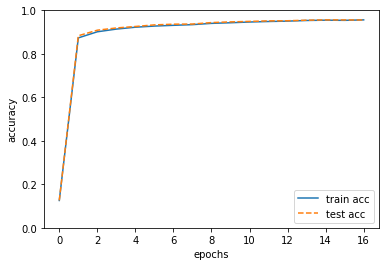

In [106]:
import matplotlib.pyplot as plt

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [107]:
import numpy as np
from dataset.mnist import load_mnist
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient  # 수치미분 함수
from collections import OrderedDict
import pickle
import matplotlib.pyplot as plt

class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """

    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))
        
            # 가중치 초기화
        self.params = {}
        self.params['W1'] = np.sqrt(1/input_dim[1]) * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = np.sqrt(1/pool_output_size) * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = np.sqrt(1/hidden_size) * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()



    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x



    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)



    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1: t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i * batch_size:(i + 1) * batch_size]
            tt = t[i * batch_size:(i + 1) * batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]



    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads



    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads



    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)



    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i + 1)]
            self.layers[key].b = self.params['b' + str(i + 1)]



# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet()


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")


# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]


    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    # 매개변수 갱신

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


Saved Network Parameters!
600.0
(60000, 1, 28, 28)
train acc, test acc | 0.374933333333, 0.3853
(60000, 1, 28, 28)
train acc, test acc | 0.961116666667, 0.963
(60000, 1, 28, 28)
train acc, test acc | 0.975916666667, 0.9762
(60000, 1, 28, 28)
train acc, test acc | 0.982316666667, 0.9795
(60000, 1, 28, 28)
train acc, test acc | 0.984866666667, 0.9834
(60000, 1, 28, 28)
train acc, test acc | 0.986483333333, 0.984
(60000, 1, 28, 28)
train acc, test acc | 0.98765, 0.9822
(60000, 1, 28, 28)
train acc, test acc | 0.989766666667, 0.9851
(60000, 1, 28, 28)
train acc, test acc | 0.99125, 0.985
(60000, 1, 28, 28)
train acc, test acc | 0.99085, 0.9861
(60000, 1, 28, 28)
train acc, test acc | 0.9928, 0.9868
(60000, 1, 28, 28)
train acc, test acc | 0.992866666667, 0.987
(60000, 1, 28, 28)
train acc, test acc | 0.992083333333, 0.9864
(60000, 1, 28, 28)
train acc, test acc | 0.994366666667, 0.9884
(60000, 1, 28, 28)
train acc, test acc | 0.99495, 0.9887
(60000, 1, 28, 28)
train acc, test acc | 0.9954,

In [ ]:
# 위의 cnn에 배치정규화를 적용하시오
import numpy as np
from dataset.mnist import load_mnist
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient  # 수치미분 함수
from collections import OrderedDict
import pickle
import matplotlib.pyplot as plt

class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """

    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))
        
            # 가중치 초기화
        self.params = {}
        self.params['W1'] = np.sqrt(1/input_dim[1]) * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = np.sqrt(1/pool_output_size) * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = np.sqrt(1/hidden_size) * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['BatchNorm1'] = BatchNormalization(gamma=1.0, beta=0.)
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['BatchNorm2'] = BatchNormalization(gamma=1.0, beta=0.)
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()



    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x



    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)



    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1: t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i * batch_size:(i + 1) * batch_size]
            tt = t[i * batch_size:(i + 1) * batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]



    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads



    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads



    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)



    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i + 1)]
            self.layers[key].b = self.params['b' + str(i + 1)]
            
class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원 

        # 시험할 때 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

        
    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
        
        
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out


    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx


    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet()


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")


# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]


    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    # 매개변수 갱신

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


Saved Network Parameters!
600.0
(60000, 1, 28, 28)
train acc, test acc | 0.515766666667, 0.5205


In [ ]:
import matplotlib.pyplot as plt

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 위의 cnn에 합성곱층과 pooling 층을 하나 더 추가하시오
import numpy as np
from dataset.mnist import load_mnist
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient  # 수치미분 함수
from collections import OrderedDict
import pickle
import matplotlib.pyplot as plt

class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """

    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))
        
            # 가중치 초기화
        self.params = {}
        self.params['W1'] = np.sqrt(1/input_dim[1]) * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = np.sqrt(1/pool_output_size) * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = np.sqrt(1/hidden_size) * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Conv2'] = Convolution(self.params['W2'], self.params['b2'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu2'] = Relu()
        self.layers['Pool2'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W4'], self.params['b4'])

        self.last_layer = SoftmaxWithLoss()



    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x



    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)



    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1: t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i * batch_size:(i + 1) * batch_size]
            tt = t[i * batch_size:(i + 1) * batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]



    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads



    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads



    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)



    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i + 1)]
            self.layers[key].b = self.params['b' + str(i + 1)]



# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet()


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")


# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]


    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    # 매개변수 갱신

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
